# Interpolation of Data Points

## Contents 

1. Compute $y$-values of polynomials $p(x)$ in standard form $\sum_{i=0}^n a_ix^i$.  

    ```
    Input = coefficients a_n,..., a_1, a_0 of p(x) and x-value x_0 to be evaluated
    Output = the resulting y-value p(x_0)
    ```

    We do this in two ways, **directly** using ```for``` loops, and via **Horner's method** which uses a ```for``` loop based on the synthetic division algorithm.
2. **Single polynomial interpolation** of $n+1$ data points $(x_0,y_0),\dots,(x_n,y_n)$, presumably on the graph of some unknown but sought function $f(x)$.   
    a.  **Lagrange interpolation** is the most common and straightforward.  We illustrtate **three ways** to compute the $y$-value of a Lagrange polynomial:  \
       * **direct**     
       * **Neville's method** using divided differences  \
       * **Newton's method** using divided differences  \
    b. **Hermite interpolation** tries to improve on Lagrange by requiring also the *derivatives* $p'(x_i)$ to agree with $f'(x_i)$ at the nodes.  Its computation is more involved, but the resulting interpolant is more accurate.
3. **Piecewise polynomial interpolation** uses ***different polynomials*** $p_i(x)$ on different subintervals $[x_i,x_{i+1}]$, of the same degree.  \
    a. **Piecewise linear** interpolation uses different lines between nodes  \
    b. **piecewise cubic** (aka **cubic splines**) interpolantion uses cubics between nodes

### Import Libraries

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly

import matplotlib.pyplot as plt

import scipy as sp
from scipy.interpolate import lagrange

## General Numerical Evaluation of Polynomial y-Values

Our ultimate goal is to approximate the unknown $y$-value $f(x_0)$ with the known $y$-value $p(x_0)$.  Suppose we have already found the interpolating polynomial $p(x)$--meaning we have found its coefficients $a_n,\dots,a_0$--then it is a *separate* task to *compute its $y$-value at $x_0$*.  Let us begin with the simpler question of polynomial evaluation.  

### User Input of the Polynomial Coefficients

For both of these methods, **we require the user to input**
1. the polynomial $p(x)$, equivalently the coefficients $a_n,\dots,a_0$
2. the $x$-value $x_0$ at which the user wishes to evaluate $p(x)$

### Direct Polynomial Evaluation from Standard Form

Evaluating a polynomial $p(x)$ expressed in the standard expanded form $\sum_{k=0}^n a_kx^k$ with *known coefficients* $a_k$ at a point $x=x_0$ can be done directly with a single for loop, as with any sum.  This also keeps track of the powers of $x_0$.  

First, we **prompt the user** to enter the polynomial, which amounts to entering the coefficients $a_n,a_{n-1},\dots,a_1,a_0$, and the $x$-value we want to plug it, $x_0$.  

In [ ]:
n = int(input("\n\t What is the degree of the polynomial p(x)?\n\n"))
prompt1="\n\t Enter the coefficients of p(x), in decreasing order starting with a_n,...\n\n"
print(prompt1)

# Make the list with coefficient string names a_k

COEFF = []
for i in range(0,n+1):
    COEFF.append("a"+str(n-i)+" = ")

l = len(COEFF)

# Use the COEFF list to prompt inputs for the numerical values of the coefficients

COEFF_NUM = []

for i in range(0,l):
    d = COEFF[i]
    COEFF_NUM.append(float(input(d)))

# Prompt user to enter the specific x-value x0      
          
x0 = float(input("\n\t Enter the x-value $x_0$ at which you would like to evaluate p(x).\n\n"))


	 Enter the coefficients of p(x), in decreasing order starting with a_n,...




*(I evaluated* $p(x) = -2x^5+x^4+4x^3-3x^2+5x+2$ *at* $x_0 = 2.3$ *to produce the displayed output)*

Then we **run the evaluation loop**.

In [3]:
# Direct polynomial evaluation

p = 0
for i in range(n+1):
    p = p+COEFF_NUM[n-i]*x0**i

print("\n\t If the coefficients of p(x) are\n")
for i in range(n+1):
    print("\t {:4s}{:>0.0f}".format(COEFF[i],COEFF_NUM[i]))

print("\n\t then direct evaluation gives p({:^0.1f}) = {:^0.4f}".format(x0,p))


	 If the coefficients of p(x) are

	 a5 = -2
	 a4 = 1
	 a3 = 4
	 a2 = -3
	 a1 = 5
	 a0 = 2

	 then direct evaluation gives p(2.3) = -54.4448


### Horner's Method of Polynomial Evaluation from Standard Form

**Horner's method** uses polynomial division instead for evaluation purposes.  Let 

$$
q(x)=\sum_{k=0}^{n-1}b_{k+1}x^k
$$ 

be the **quotient polynomial**, and $b_0$ the **remainder term**, obtained from dividing $p(x)$ by $(x-x_0)$,

$$
p(x)=(x-x_0)q(x)+b_0
$$

The most basic fact about this is that we get the **the remainder term** $b_0$ is the desired $y$-value in the form of, because plugging in $x=x_0$ gives 

$$
\boxed{
\ p(x_0)=0q(x_0)+b_0=b_0
\ }
$$ 

When working by hand, **synthetic division** is typically used to compute $b_0,\dots, b_n$,

$$
\begin{aligned}
&\begin{array}{cccc}
        &a_n&\qquad a_{n-1}\qquad &\ \cdots &\quad a_0\\
        x_0\ &\downarrow&b_n&\ \cdots&\quad \ast
\end{array}\\
&\text{-------------------------------------}\\
&\begin{array}{cccc}
        \quad &a_n&a_{n-1}+b_nx_0&\cdots&\ \ast\\
        &=b_n&=b_{n-1}&\cdots&\ =b_0
\end{array}
\end{aligned}
$$
but the **underlying idea**, which is what we need to code, anyway, is to **define the $b_k$ recursively**
$$
\boxed{
\ \begin{aligned}
b_n&\stackrel{\text{def}}{=}a_n\\
b_{n-1}&\stackrel{\text{def}}{=}a_{n-1}+b_nx_0\\
&\ \vdots\\
b_0&\stackrel{\text{def}}{=}a_0+b_1x_0
\end{aligned}\ }
$$

This can be done with a for loop.  First, we make a list of the quotient coefficients names $b_j$ for output, then we run Horner's method.

In [4]:
# Horner's Method

# Make the lists with coefficient names b_k

C = []
for i in range(0,n+1):
    C.append("b"+str(n-i)+" = ") 

# Use the list COEFF_NUM and x0 to plug into Horner's method, and generate the b_k's
B = [COEFF_NUM[0]]

for i in range(0,l-1):
    b = B[i]
    B.append(COEFF_NUM[i+1]+b*x0)

# Print out, remembering that b_0 is our desired y-value p(x0)

print("\n\t The coefficients b1,...b_n of the qotient polynomial q(x), satisfying")
print("\t p(x)=(x-x_0)q(x)+b_0, as well as b_0=p(x_0) itself, are\n")

for i in range(n+1):
    print("\t {:4s}{:0.2f}".format(C[i],B[i]))

print("\n\t so Horner's method gives p({:^0.1f}) = b_0 = {:^0.4f}".format(x0,B[n]))


	 The coefficients b1,...b_n of the qotient polynomial q(x), satisfying
	 p(x)=(x-x_0)q(x)+b_0, as well as b_0=p(x_0) itself, are

	 b5 = -2.00
	 b4 = -3.60
	 b3 = -4.28
	 b2 = -12.84
	 b1 = -24.54
	 b0 = -54.44

	 so Horner's method gives p(2.3) = b_0 = -54.4448


## Single Polynomial Interpolation of $n+1$ Data Points

### Lagrange Polynomial Interpolation 

Given data points $(x_0,f(x_0)),\dots,(x_n,f(x_n))$, we first seek to connect, or **interpolate** them by a **single polynomial** $p(x)$.  The $n\text{th}$ **Lagrange polynomial** 

$$
\boxed{
\ \begin{aligned} 
p(x)    &= f(x_0)L_0(x)+\cdots +f(x_n)L_n(x)\\
        &= \sum_{i=0}^nf(x_i)\frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
\end{aligned}\ }
$$

is the *unique degree* $n$ polynomial passing through the $n+1$ points, since $(L_0, L_1,\dots, L_n)$ forms a **basis** for the $(n+1)$-dimensional vector space $\mathbb{R}_n[x]$ of polynomials of degree $\leq n$, as can be seen from

$$
L_i(x)\stackrel{\text{def}}{=}\frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
\quad\implies \quad
L_i(x_j)=
\begin{cases}
0,& \text{if }i\neq j\\ 
1,& \text{if }i=j\\
\end{cases}
\quad\implies \quad
f(x_j)L_i(x_j)=
\begin{cases}
0,& \text{if }i\neq j\\ 
f(x_j),&\text{if }i=j
\end{cases}
$$  

Examples:

1. If we only have two data points ($n=1$), say $(x_0,f(x_0))$, $(x_1,f(x_1))$, the 1st Lagrange polynomial is the *unique line through the two points*, 
        
$$
p(x)    = f(x_0)L_0(x)+f(x_1)L_1(x)
        = f(x_0)\frac{x-x_1}{x_0-x_1}+f(x_1)\frac{x-x_0}{x_1-x_0}
$$

2. If we have three data points ($n=2$), say $(x_0,f(x_0))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, then the 2nd Lagrange polynomial is the *unique parabola passing through the three points*,

$$
\begin{aligned}
p(x)    &= f(x_0)L_0(x)+f(x_1)L_1(x)+f(x_2)L_2(x)\\
        &= f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}+f(x_1)\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}+f(x_2)\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{aligned}
$$

#### Error Bound for Lagrange Interpolation

The **generalized Rolle theorem** says

* If $f\in C^n([a,b])$ and if $f(x_i)=0$ for all $a\leq x_0< x_1<\cdots< x_n\leq b$, then $\exists c\in (x_0,x_n)\subseteq [a,b]$ for which $f^{(n)}(c)=0$.  

Using this we can show---using the function $g(t)=f(t)-p(t)-(f(x)-p(x))\prod_{i=0}^n\frac{(t-x_i)}{(x-x_i)})$---that $\exists c\in (a,b)$ for which 

$$
f(x)-p(x)=\frac{f^{(n+1)(c)}}{(n+1)!}\prod_{i=0}^n(x-x_i)
$$

Then the RHS can be maximized over $[a,b]$.  For $n\geq 4$ the Lagrange polynomial $p(x)$ gives a pretty good approximation to $f(x)$ for *any* $x\in [a,b]$, and clearly more accurately with greater $n$ (which makes $\Delta x=\max_i |x_i-x_{i-1}|$ and $1/(n+1)!$ smaller). 

### Lagange Polynomial Interpolation Example

Given $5$ data points,

\begin{align*}
(x_0,y_0)      &\ =\ (-2, 3^{-2})   &&\approx\ (-2, 0.1111)\\
(x_1,y_1)      &\ = \ (-1, 3^{-1})  &&\approx\ (-1, 0.3333)\\
(x_2,y_2)      &\ = \ (0, 3^0)      &&=\ (0,1)\\
(x_3,y_3)      &\ = \ (1,3)         &&=\ (1,3)\\
(x_{4},y_{4})  &\ =\ (2, 3^2)       &&=\ (2,9)
\end{align*}

on the graph of $f(x)=3^x$ we fit an degree $4$ Lagrange polynomial through them and use it to approximate $f(0.5)=\sqrt{3}$ by the interpolation value $p(0.5)$.  

However, the above methods would require us to FOIL out the Lagrange polynomial to put it into standard form, which is more hassle than its worth, especiall when there are easy methods to evaluate Lagrange polynomials in their natural un-FOILed form.  There are **two methods** to compute $p(0.5)$, the **direct method** and **Neville's method**

#### Direct Evaluation of Lagrange Polynomials

Since Lagrange polynomials have their own special form *unFOILed*, 

$$
\begin{aligned} 
p(x)    &= y_0L_0(x)+\cdots +y_{n-1}L_{n-1}(x)\\
        &= \sum_{i=0}^{n-1} y_i\frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
\end{aligned}
$$

we can simply use this expression to **compute the $y$-value $p(x_0)$ directly**, using nested for loops. 


	Given 5 data points on the graph of f(x) = 3^x,

	 n	 x	 y = 3^x
	-------------------------
	 0	 -2.0	 0.1111
	 1	 -1.0	 0.3333
	 2	 0.0	 1.0000
	 3	 1.0	 3.0000
	 4	 2.0	 9.0000

	the degree 4 Lagrange interpolating polynomial approximates
	f(0.5) by the interpolating value p(0.5) = 1.7083.


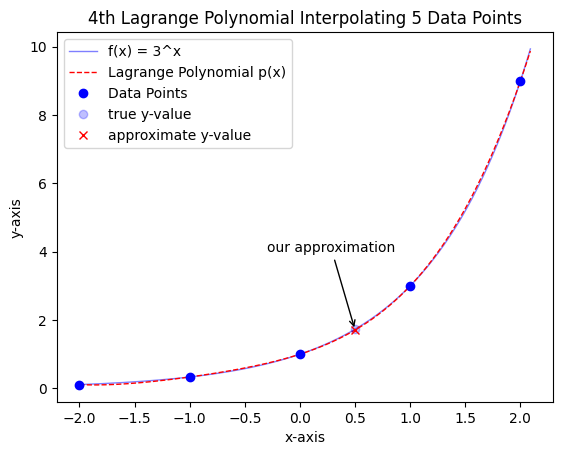

In [5]:
# Direct Lagrange Polynomial Interpolation Example

# data x-values
data_x = [-2.0, -1.0, 0.0, 1.0, 2.0]
ld = len(data_x)
deg = ld - 1

# our function and its y-values
def f(x):
    return 3**x

# data y-values 
data_y = [f(data_x[i]) for i in range(ld)]

# interpolation point
xp = 0.5 

# Lagrange polynomial 

def LP(a,b):
    def g(x):
        y = 0
        for i in range(ld):
            p = 1
            for j in range(ld):
                if i != j:
                    p = p * (x - a[j])/(a[i] - a[j])
            y = y + p * b[i] 
        return y  
    return g
g = LP(data_x,data_y)
yp = g(xp)

# printout
print("\n\tGiven {:d} data points on the graph of f(x) = 3^x,".format(ld))
print("\n\t n\t x\t y = 3^x")
print("\t-------------------------")
kk = 0
for i in range(ld):
    print("\t {0:<d}\t {1:^0.1f}\t {2:<0.4f}".format(kk,data_x[i],data_y[i]))
    kk += 1
print("\n\tthe degree {:d} Lagrange interpolating polynomial approximates".format(deg))
print("\tf({0:0.1f}) by the interpolating value p({0:0.1f}) = {1:0.4f}.".format(xp,yp))

# plot with matplotlib

xs = np.arange(-2,2.1,0.01) 
ypp = 3**xp
                                                # x-values
fig,ax =plt.subplots()
ax.plot(xs,f(xs),color = "b", label="f(x) = 3^x",linewidth = 1,alpha=0.5)             # plot f(x) = 3^x
ax.plot(xs,g(xs),color = "r", label="Lagrange Polynomial p(x)",linewidth = 1, linestyle='dashed')    # plot g(x) = Lagrange Polynomial
ax.plot(data_x,data_y,'o',color='b',label="Data Points")                                        # plot the data points
ax.plot(xp,ypp,'bo', alpha=0.25,label="true y-value")                                           # plot the true y-value
ax.plot(xp,yp,'rx',label="approximate y-value")                                                 # plot the approx y-value
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.annotate('our approximation', xy=(xp,yp), xytext=(-0.3,4),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.legend()
ax.set_title("4th Lagrange Polynomial Interpolating 5 Data Points")
plt.show()

We remark that **SciPy** has a built-in **Lagrange polynomial function**, ```lagrange( , )```, which takes two lists ```a``` and ```b``` of $x$-values and $y$-values, respectively, of the ***data points*** and **returns** their interpolating ***Lagrange polynomial $p(x)$***.  It requires importing ```scipy```, and then importing from ```scipy.interpolate``` the ```lagrange``` function.  But we preferred to do it ourselves, and defined our own ```LP( , )``` function of lists by 

```
def LP(a,b):
    def g(x):
        y = 0
        for i in range(len(a)):
            p = 1
            for j in range(len(a)):
                if i != j:
                    p = p * (x - a[j])/(a[i] - a[j])
            y = y + p * b[i] 
        return y  
    return g
```

which we ran on the dataset lists ```data_x``` and ```data_y``` to produce the polynomial we called $g(x)$ 

```
g = LP(data_x,data_y)
```

We then evaluated it at ```xp``` via ```yp = g(xp)```.

#### Neville's Method

We can evaluate $L(x)$ at $x = x_0$ in other ways, and we introduct two.  The first, **Neville's method**, uses different $k\text{th}$ Lagrange polynomials, $k=0,\dots,n$, interpolating any $k$ of the data points $(x_0,f(x_0)),\dots,(x_n,f(x_n))$, to **recursively compute** the $n\text{th}$ **Lagrange polynomial** $p(x)$.  To see how this works, define the degree $n-1$ polynomial

$$
p_{\hat{i}}(x)=\sum_{{j=0, j\neq i}}^nf(x_j)\prod_{k=0, k\neq j}^n\frac{x-x_j}{x_k-x_j}
$$

Then, for any $i\neq j$ it is a straightforward computation to show that the $n\text{th}$ Lagrange polynomial is given by 

$$
p(x)=
\frac{(x-x_j)p_{\hat{j}}(x)-(x-x_i)p_{\hat{i}}(x)}{x_i-x_j}
$$

This works more generally for any $k\in \{1,\dots, n\}$, and so allows for a **recursion algorithm**:  for any multi-index $I_k=\{i_1<\cdots<i_k\}$ let $p_{I_k}$ be the $k\text{th}$ Lagrange polynomial through $(x_{i_1},f(x_{i_1})),\dots, (x_{i_k},f(x_{i_k}))$.  Thinking of $p_i$ as the single $y$-value $y_i=f(x_i)$, we can recursively compute $p_{I_k}(x)$ in the following order (in the case $n=4$)

$$
\begin{aligned}
y_0\equiv\:      &p_0(x)\quad        &                  &                   &                           &\\
y_1\equiv\:      &p_1(x)\quad        &p_{0,1}(x)\quad   &                   &                           &\\
y_2\equiv\:       &p_2(x)\quad       &p_{1,2}(x)\quad   &p_{0,1,2}(x)\quad  &                           &\\
y_3\equiv\:       &p_3(x)\quad       &p_{2,3}(x)\quad   &p_{1,2,3}(x)\quad  &p_{0,1,2,3}(x)\quad        &\\
y_4\equiv\:       &p_4(x)\quad       &p_{3,4}(x)\quad   &p_{2,3,4}(x)\quad  &p_{1,2,3,4}(x)\quad        &p_{0,1,2,3,4}(x)\equiv p(x)
\end{aligned}
$$

where e.g. $p_{0,1}(x)=\frac{(x-x_0)p_1(x)-(x-x_1)p_0(x)}{x_1-x_0}$ and $p_{2,3,4}=\frac{(x-x_2)p_{3,4}(x)-(x-x_4)p_{2,3}(x)}{x_4-x_2}$.  

Let us illustrate this algorightm using the same $5$ data points ($n=4$) from the graph of $f(x)=3^x$, evaluating $p(x)=p_{0,1,2,3,4}(x)$ at $x=0.5$, which is the bottom-right term in the array above.  A $2$-dimensional array can be produced by two nested for loops.

In [6]:
# We use the same dataset as before, but a different
# algorithm for the evaluation itself:  Neville's Method.

Q = [[] for i in range(ld)]
Q[0] = data_y

# implement Neville's Method
for i in range(1,ld):
    for j in range(i,ld):
        xi = data_x[j]
        xij = data_x[j-i]
        Qij = Q[i]
        R = Q[i-1]
        s = ((xp-xij)*R[j-i+1]-(xp-xi)*R[j-i])/(xi-xij)
        Qij.append(s)
    Q[i]=Qij

# display output

# add zeros to the beginning of all the Q[i] vectors
for i in range(ld):
    T = ["" for k in range(i)]
    Q[i]=T+Q[i]

# transpose Q, so that it sits right
S = [[row[i] for row in Q] for i in range(ld)]

# print title and data points
print("\n\tGiven {:d} data points on the graph of f(x) = 3^x,".format(ld))
print("\n\t n\t x\t y = 3^x")
print("\t-------------------------")
kk = 0
for i in range(ld):
    print("\t {0:<d}\t {1:^0.1f}\t {2:<0.4f}".format(kk,data_x[i],data_y[i]))
    kk += 1
print("\n\tNeville's method says the degree {:d} Lagrange interpolating".format(deg))
print("\tpolynomial approximates f({0:0.1f}) by the interpolating value".format(xp))
print("\tp({0:0.1f}) = {1:0.4f} seen in the bottom right corner of the table:\n".format(xp,S[4][4]))

# print out S=transpose(Q)
for i in range(ld):
    print("\t",format(S[i][0], ".7f") if type(S[i][0])==float else "",\
          "\t",format(S[i][1], ".7f") if type(S[i][1])==float else "",\
          "\t",format(S[i][2], ".7f") if type(S[i][2])==float else "",\
          "\t",format(S[i][3], ".7f") if type(S[i][3])==float else "",\
          "\t",format(S[i][4], ".7f") if type(S[i][4])==float else "")





	Given 5 data points on the graph of f(x) = 3^x,

	 n	 x	 y = 3^x
	-------------------------
	 0	 -2.0	 0.1111
	 1	 -1.0	 0.3333
	 2	 0.0	 1.0000
	 3	 1.0	 3.0000
	 4	 2.0	 9.0000

	Neville's method says the degree 4 Lagrange interpolating
	polynomial approximates f(0.5) by the interpolating value
	p(0.5) = 1.7083 seen in the bottom right corner of the table:

	 0.1111111 	  	  	  	 
	 0.3333333 	 0.6666667 	  	  	 
	 1.0000000 	 1.3333333 	 1.5000000 	  	 
	 3.0000000 	 2.0000000 	 1.8333333 	 1.7777778 	 
	 9.0000000 	 0.0000000 	 1.5000000 	 1.6666667 	 1.7083333


#### Newton's Divided Differences to Find Lagrange Coefficients

If we instead write $p(x)$ in the ***alternate form***
$$
p(x)=\sum_{i=0}^n a_i \prod_{j=0}^{i}(x-x_j)
$$ 

where obviously $a_i = y_i/\prod_{j\neq i}(x_i-x_j)$, then there is a method to compute *these* coefficients $a_i$ 

$$
\begin{aligned}
&f[x_i]=f(x_i)  &\text{zeroth divided difference}\\
&f[x_i,x_{i+1}]=\frac{f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i} &\text{first divided difference}\\
&f[x_i,\dots,x_{i+k}]=\frac{f[x_{i+1},\dots,x_{i+k}]-f[x_i,\dots,x_{i+k-1}]}{x_{i+k}-x_i}&\text{$k$th divided difference}
\end{aligned}
$$

In fact, since $f(x_i)=p(x_i)$ for all $i$, we can recursively solve for the $a_i$,

$$
\begin{aligned}
a_0&=f[x_0]\\
a_1&=f[x_0,x_1]\\
a_k&=f[x_0,\dots,x_k]
\end{aligned}
$$

The method of computing these is similar to Neville's method, and only takes minor modifications to that code.  If, say, $n=4$, the coefficients $a_0,\dots, a_4$ are read off the top diagonal of the following table

$$
\begin{aligned}
x_0\quad       &f[x_0]\quad    &                    &                       &                          &\\
x_1\quad       &f[x_1]\quad    &f[x_0,x_1]\quad     &                       &                          &\\
x_2\quad       &f[x_2]\quad    &f[x_1,x_2]\quad     &f[x_0,x_1,x_2]\quad    &                          &\\
x_3\quad       &f[x_3]\quad    &f[x_2,x_3]\quad     &f[x_1,x_2,x_3]\quad    &f[x_0,x_1,x_2,x_3]\quad   &\\
x_4\quad       &f[x_4]\quad    &f[x_3,x_4]\quad     &f[x_2,x_3,x_4]\quad    &f[x_1,x_2,x_3,x_4]\quad   &f[x_0,x_1,x_2,x_3,x_4]
\end{aligned}
$$

In [7]:
# Coefficients of the nth Lagrange polynomial in the form 
# p(x)=\sum_{i=0}^n a_i \prod_{j=0}^{i}(x-x_j)

QQ = [[] for i in range(ld)]
QQ[0] = data_y

# Implementing Newton's Divided Differences Method
for i in range(1,ld):
    for j in range(i,ld):
        xi = data_x[j]
        xij = data_x[j-i]
        Qij = QQ[i]
        RR = QQ[i-1]
        ss = (RR[j-i+1]-RR[j-i])/(xi-xij)
        Qij.append(ss)
    QQ[i]=Qij

# Printout

print("\n\tNewton's Divided Difference Method:")
print("\n\tGiven {:d} data points on the graph of f(x) = 3^x,".format(ld))
print("\n\t n\t x\t y = 3^x")
print("\t-------------------------")
kk = 0
for i in range(ld):
    print("\t {0:<d}\t {1:^0.1f}\t {2:<0.4f}".format(kk,data_x[i],data_y[i]))
    kk += 1
print("\n\tthe degree {:d} Lagrange interpolating polynomial in the special form".format(ld))
print("\n\t\t p(x)=sum prod f[x0,..,xk](x-x0)...(x-xk-1)\n")
print("\thas coefficients f[x0,..,xk] given along the diagonal of the table:")

# Transpose the matrix Q and print out it's rows
for i in range(ld):
    TT = ["" for k in range(i)]
    QQ[i]=TT+QQ[i]

SS = [[] for i in range(ld)]

for i in range(ld):
    for j in range(ld):
        SS[i].append(QQ[j][i])

print("\n\tf[xi]\t\tf[xi,xi+1]\tf[xi..xi+2]\tf[xi..xi+3]\tf[xi..xi+4]")
print("\t---------------------------------------------------------------------------")
for i in range(ld):
    print("\t",format(SS[i][0], ".7f") if type(SS[i][0])==float else "",\
          "\t",format(SS[i][1], ".7f") if type(SS[i][1])==float else "",\
          "\t",format(SS[i][2], ".7f") if type(SS[i][2])==float else "",\
          "\t",format(SS[i][3], ".7f") if type(SS[i][3])==float else "",\
          "\t",format(SS[i][4], ".7f") if type(SS[i][4])==float else "")

# Evaluating at xp using this special form of p(x)
ypp = SS[0][0]

for i in range(1,ld):
    pp = 1
    for j in range(i):
        pp = pp*(xp-data_x[j])
    ypp = ypp + SS[i][i]*pp

print("\n\tUsing these, p({0:0.1f}) approximates f({0:0.1f}) by:".format(ld))    
print("\t-------------------")
print("\t p({0:0.1f}) = {1:0.7f}".format(xp,ypp))


	Newton's Divided Difference Method:

	Given 5 data points on the graph of f(x) = 3^x,

	 n	 x	 y = 3^x
	-------------------------
	 0	 -2.0	 0.1111
	 1	 -1.0	 0.3333
	 2	 0.0	 1.0000
	 3	 1.0	 3.0000
	 4	 2.0	 9.0000

	the degree 5 Lagrange interpolating polynomial in the special form

		 p(x)=sum prod f[x0,..,xk](x-x0)...(x-xk-1)

	has coefficients f[x0,..,xk] given along the diagonal of the table:

	f[xi]		f[xi,xi+1]	f[xi..xi+2]	f[xi..xi+3]	f[xi..xi+4]
	---------------------------------------------------------------------------
	 0.1111111 	  	  	  	 
	 0.3333333 	 0.2222222 	  	  	 
	 1.0000000 	 0.6666667 	 0.2222222 	  	 
	 3.0000000 	 2.0000000 	 0.6666667 	 0.1481481 	 
	 9.0000000 	 6.0000000 	 2.0000000 	 0.4444444 	 0.0740741

	Using these, p(5.0) approximates f(5.0) by:
	-------------------
	 p(0.5) = 1.7083333


#### Error Analysis on the Above Lagrange Interpolation 

All three methods--direct, Neville, Newton---give the same degree $4$ Lagrange polynomial through the five data points on the graph of $f(x)=3^x$, and therefore give the same approximation to $f(0.5)=\sqrt{3}$.  How good is this approximation (whether using the direct method or Neville's method)? 

In [8]:
# error analysis 
pxp = S[ld-1][ld-1]
fp = f(xp)
Ep = abs(pxp - fp)
print("\n\tThe approximate and actual values, as well as the error, are:")
print("\n\tp({0:0.1f})\t\tf({0:0.1f})\t\tE({0:0.1f})".format(xp))
print("\t-----------------------------------------")
print("\t{0:0.7f}\t{1:<0.7f}\t{2:0.7f}".format(pxp,fp,Ep))


	The approximate and actual values, as well as the error, are:

	p(0.5)		f(0.5)		E(0.5)
	-----------------------------------------
	1.7083333	1.7320508	0.0237175


### Hermite Polynomial Interpolation 

Suppose the mystery function $f$ additionally lies in $C^m([a,b])$, for the same $n+1$ data points $(x_i,f(x_i))$.  The Lagrange polynomial $p(x)$ agrees with $f(x)$ on all $x_i$, but we would like to consider the possibility that ***all derivatives*** up to order $m$ also agree on all $x_i$,

$$
\begin{aligned}
&p(x_0)=f(x_0)                      &&p(x_1)=f(x_1)             &\cdots\quad &&p(x_n)=f(x_n)&&\textcolor{red}{(\text{Lagrange polynomial})}\\
&p'(x_0)=f'(x_0)                    &&p'(x_1)=f'(x_1)           &\cdots\quad &&p'(x_n)=f'(x_n)&&\textcolor{red}{(\text{Hermite polynomial})}\\
&\quad\qquad\vdots\quad             &&\quad\qquad\vdots         &\cdots\quad &&\vdots\qquad\quad\\
&p^{(m)}(x_0)=f^{(m)}(x_0)\qquad    &&p^{(m)}(x_1)=f^{(m)}(x_1) &\cdots\quad &&p^{(m)}(x_n)=f^{(m)}(x_n)&&\textcolor{red}{(m\text{th order osculating polynomial})}
\end{aligned}
$$

This would make $p(x)$ a sort of $m\text{th}$ Taylor polynomial for $f$ **at each** $x_i$.  The **Hermite polynomial** satisfies the first two lines of the above general definition of an $m\text{th}$ order **osculating polynomial** (osculum = kiss in Latin).  It does one better than the Lagrange polynomial in that it not only has the same $y$-value, but also has the same *direction* at each $x_i$.

The crucial theorem allowing for an algorithm to be developed is the following (Theorem 3.9 in Burden and Faires, *Numerical Analysis*, 9th Ed):

* **Theorem (Hermite Polynomials):**
    Let $f\in C^1([a,b])$, and let $a\leq x_0<x_1<\cdots< x_n\leq b$.  The ***unique polynomial*** (osculating 1st degree polynomial)  agreeing with $f$ and $f'$ at each $x_i$ is the **Hermite polynomial** of degree at most $2n+1$ given by 
    $$
    \boxed{\ 
    H_{2n+1}(x)\ \stackrel{\text{def}}{=}\ \sum_{i=0}^n f(x_i)H_{n,i}(x) + \sum_{i=0}^nf'(x_i)\hat{H}_{n,i}(x)
    \ }
    $$
    where
    $$
    \begin{aligned}
    H_{n,i}(x)          &\ \stackrel{\text{def}}{=}\ \bigl(1=2(x-x_i)L'_{n,i}(x_i)\bigr)L^2_{n,i}(x)\\
    \hat{H}_{n,i}(x)    &\ \stackrel{\text{def}}{=}\ (x-x_i)L^2_{n,i}(x)\\
    L_{n,i}(x)        &\ \stackrel{\text{def}}{=}\ \frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
    \end{aligned}
    $$
    $\biggl(\biggr.$ recalling that the $n$th Lagrange polynomials satisfy $\biggl. L_{n,i}(x_j)=\begin{cases}0,& \text{if }i\neq j\\ 1,& \text{if }i=j\\\end{cases}\biggr)$

The unwieldiness of this expression motivates the following ***algorithm for expressing it*** without computing each of the components $L^2_{n,i}(x)$, $L'_{n,i}(x)$, $H_{n,i}(x)$, and $\hat{H}_{n,i}(x)$.  It works with ***divided differences*** as in Newton's method for finding the coefficients $a_i$ of the Lagrange polynomial $p(x)$ in the special form 

$$
p(x)=\sum_{i=0}^n a_i \prod_{j=0}^{i}(x-x_j)
$$ 

where $a_0 = f[x_0]\equiv f(x_0)$ and $a_i = f[x_0,\dots,x_{i}]=\frac{f[x_{1},\dots,x_{i}]-f[x_0,\dots,x_{i-1}]}{x_{i}-x_0}$. 

#### Hermite Polynomial Using Divided Differences

Newton's method can be adapted for Hermite polynomials by taking note of the following observation:  If we define
$$
\begin{aligned}
&z_0=z_1\stackrel{\text{def}}{=} x_0\\
&z_2=z_3\stackrel{\text{def}}{=} x_1\\
&\ \ \vdots\\
&z_{2n}=z_{2n+1}\stackrel{\text{def}}{=}x_n
\end{aligned}
$$
then
$$
f[z_{2i},z_{2i+1}] \stackrel{\text{def}}{=}\frac{f[z_{2i+1}]-f[z_{2i}]}{z_{2i+1}-z_{2i}}\approx f'(z_{2i})=f'(x_i)
$$
The approximation gets only better with larger $n$, which makes each $\Delta_i z=z_{2i+1}-z_i$ smaller and the quotient closer to $f'(z_{2i})$.  We therefore ***substitute $f'(x_i)$ for $f[z_{2i},z_{2i+1}]$***. The remaining divided differences are produced recursively as before, with the result that 
$$
\boxed{\ 
H_{2n+1}(x)\ \approx\ \sum_{i=0}^{2n+1} f[z_0,\dots,z_i] \prod_{j=0}^{i}(x-x_j)
\ }
$$
with these substitutions in place.  Finally, we evaluate the polynomial at $x_0$ as in the Newton case.  

#### Example of Hermite Interpolation

**Exercise 3.4.10** in Burden and Faires, *Numerical Analysis*, 9th Ed:  A car traveling along a straight road is clocked at a number of points. The data from the observations are given in the following table, where the time $t$ is in seconds, the distance $d$ is in feet, and the speed $v$ is in feet per second.

\begin{array}{l|c|c|c|c|c}
t   &0  &3      &5      &8      &13\\
\hline
d   &0  &225    &383    &623    &993\\
\hline
v   &75 &77     &80     &74     &72
\end{array}

We are then given the following problems:
* a) Use a Hermite polynomial to predict the position of the car and its speed when $t = 10\text{s}$.
* b) Use the derivative of the Hermite polynomial to determine whether the car ever exceeds a $55$ mi/h speed limit on the road. If so, what is the first time the car exceeds this speed?
* c) What is the predicted maximum speed for the car?

The following code gives answers these question.

	 a) table
	----------
	 0.0000000 	  	  	  	  	  	  	  	  	 
	 0.0000000 	 75.0000000 	  	  	  	  	  	  	  	 
	 225.0000000 	 75.0000000 	 0.0000000 	  	  	  	  	  	  	 
	 225.0000000 	 77.0000000 	 0.6666667 	 0.2222222 	  	  	  	  	  	 
	 383.0000000 	 79.0000000 	 1.0000000 	 0.0666667 	 -0.0311111 	  	  	  	  	 
	 383.0000000 	 80.0000000 	 0.5000000 	 -0.2500000 	 -0.0633333 	 -0.0064444 	  	  	  	 
	 623.0000000 	 80.0000000 	 0.0000000 	 -0.1000000 	 0.0300000 	 0.0116667 	 0.0022639 	  	  	 
	 623.0000000 	 74.0000000 	 -2.0000000 	 -0.6666667 	 -0.1133333 	 -0.0286667 	 -0.0050417 	 -0.0009132 	  	 
	 993.0000000 	 74.0000000 	 0.0000000 	 0.2500000 	 0.1145833 	 0.0227917 	 0.0051458 	 0.0007837 	 0.0001305 	 
	 993.0000000 	 72.0000000 	 -0.4000000 	 -0.0800000 	 -0.0412500 	 -0.0194792 	 -0.0042271 	 -0.0009373 	 -0.0001324 	 -0.0000202


	 a) the Hermite polynomial
	----------
	 H(x) = (0.0000000 ) + (75.0000000 )x + (0.0000000 )x^2+(0.2222222 )x^3 + (-0.0311111 )x^4
		 +

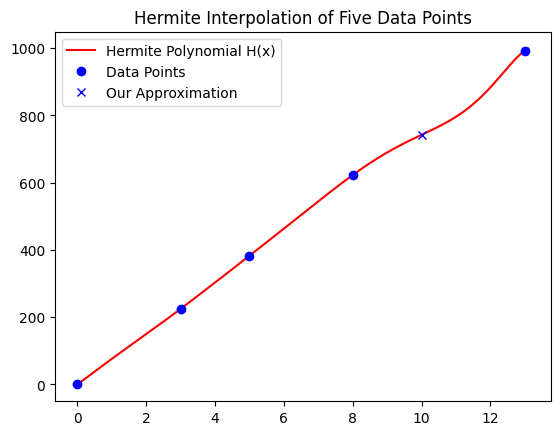

In [9]:
# Hermite Interpolation
# Exercise 3.4.10

import numpy as np
import matplotlib.pyplot as plt

# Given x, y and y' values
x = [0.0,3.0,5.0,8.0,13.0]
y = [0.0, 225.0, 383.0, 623.0, 993.0]
w = [75.0, 77.0, 80.0, 74.0, 72.0]

# Define n
n=len(x)

# List Q will be a list of empty lists which we will fill below
Q = [[] for i in range(2*n)]

# Splice x with itself to form the z's
z = []
for i in range(len(x)):
    z.append(x[i])
    z.append(x[i])

# Splice y with itself to form the corresponding y-values of f on the z's
A = []
for i in range(len(y)):
    A.append(y[i])
    A.append(y[i])

# Q[0] will be our z-list
Q[0] = z

# Q[1] will be half of our first divided differences.
# We will splice the other half--the derivatives w--with this half. 
B = []
for i in range(1,n):
    B.append((A[2*i]-A[2*i-1])/(z[2*i]-z[2*i-1]))

C = []
for i in range(1,n):
    C.append(w[i-1])
    C.append(B[i-1])
C.append(w[n-1])

Q[1] = C

# Implement Newton's Divided Differences Method
for i in range(2,2*n):
    for j in range(i,2*n):
        zi = z[j]
        zij = z[j-i]
        Qij = Q[i]
        R = Q[i-1]
        s = (R[j-i+1]-R[j-i])/(zi-zij)
        Qij.append(s)
    Q[i]=Qij

# Display output
for i in range(2*n):
    T = ["" for k in range(i)]
    Q[i]=T+Q[i]

Q[0] = A
S = [[] for i in range(2*n)]

for i in range(2*n):
    for j in range(2*n):
        S[i].append(Q[j][i])

print("\t a) table")
print("\t----------")
for i in range(2*n):
    print("\t",format(S[i][0], ".7f") if type(S[i][0])==float else "",\
          "\t",format(S[i][1], ".7f") if type(S[i][1])==float else "",\
          "\t",format(S[i][2], ".7f") if type(S[i][2])==float else "",\
          "\t",format(S[i][3], ".7f") if type(S[i][3])==float else "",\
          "\t",format(S[i][4], ".7f") if type(S[i][4])==float else "",\
          "\t",format(S[i][5], ".7f") if type(S[i][5])==float else "",\
          "\t",format(S[i][6], ".7f") if type(S[i][6])==float else "",\
          "\t",format(S[i][7], ".7f") if type(S[i][7])==float else "",\
          "\t",format(S[i][8], ".7f") if type(S[i][8])==float else "",\
          "\t",format(S[i][9], ".7f") if type(S[i][9])==float else "")

# Evaluating at xp
def H(x):
    ypH = S[0][0]
    for i in range(1,2*n):
        pH = 1
        for j in range(i):
            pH = pH*(x-z[j])
        ypH = ypH + S[i][i]*pH
    return ypH

# Interpolating point
xpH = 10

ypH = H(xpH)
print("\n\n\t a) the Hermite polynomial")
print("\t----------")
print("\t H(x) = (%.7f"%S[0][0],") + (%.7f"%S[1][1],")x + (%.7f"%S[2][2],")x^2+(%0.7f"%S[3][3],")x^3 + (%.7f"%S[4][4],")x^4")
print("\t\t + (%.7f"%S[5][5],")x^5 + (%.7f"%S[6][6],")x^6 + (%.7f"%S[7][7],")x^7 + (%.7f"%S[8][8],")x^8 + (%.7f"%S[9][9],")x^9") 
print("\n\n\t 10a evaluation")
print("\t----------")
print("\t f(10) is approximately H(10) = %0.7f"%ypH)


# 10b: Compute H'(x) and H''(x), use H'' to maximize H' on [a,b]

# Compute and store coefficients of H'(x) in C

    # Step 1: Define H' and H'' coefficients
Hp = []
for i in range(1,2*n):
    Hp.append(S[i][i]*i) 

Hpp = []
for i in range(1,2*n-1):
    Hpp.append(Hp[i]*i)

    # Step 2: Evaluate H'' at x = a and x = b
    # to see if there's a root in the middle
a = x[0]
b = x[n-1]

Hppa = 0
for i in range(0,n+1):
    Hppa = Hppa+Hpp[i]*a**i

Hppb = 0
for i in range(0,n+1):
    Hppb = Hppb+Hpp[i]*b**i

print("\n\n\t b)-c) maximize H'(x) on [0,13]")
print("\t----------")

Hab = Hppa*Hppb
print("\t H''(a) = %0.7f"%Hppa)
print("\t H''(b) = %0.7f"%Hppb)
print("\t H''(a)*H''(b) = %0.7f"%Hab)

    # Step 3: Evaluate H' at x = a and x = b

Hpa = 0
for i in range(0,n+1):
    Hpa = Hpa+Hp[i]*a**i

Hpb = 0
for i in range(0,n+1):
    Hpb = Hpb+Hp[i]*b**i

print("\n\n\t b) maximize H'(x) on [0,13]")
print("\t----------")
print("\t H'(a) = %0.7f"%Hpa)
print("\t H'(a) = %0.7f"%Hpb)

# Plot 
tH = np.linspace(0,13.1,500)
yH = [H(x) for x in tH]
    
fig, ax = plt.subplots()
ax.plot(tH,yH,color='r',label="Hermite Polynomial H(x)")
ax.plot(x,y,'bo',label="Data Points")
ax.plot([xpH],[ypH],'bx',label="Our Approximation")
ax.set_title("Hermite Interpolation of Five Data Points")
ax.legend()
plt.show()

## Piecewise Polynomial Interpolation

Given $n+1$ data points 

\begin{array}{l|l}
x           &y\\
\hline
x_0        &y_0\\
\ \vdots   &\ \vdots\\
x_n        &y_n
\end{array}

the choice of a single Lagrange polynomial has the benefit that its error decreases with larger $n$, *provided the unknown/hypothesized function $f$ is of class $C^{n+1}$*.  A second approach, which is also quite accurate but *doesn't* depend on $n$ for that, is ***piecewise interpolation***.  Our choices are typically polynomials of degree $1$ (**lines**) or degree $3$ (**cubics**), the first good for building intuition, the second for accuracy and smoothness at the meeting points.  

### Piecewise Linear (PL) Interpolation

The simplest, and most intuitive case is the **piecewise linear** interpolation, which connects each consecutive pair of data points $(x_i,y_i)$, $(x_{i+1},y_{i+1})$ by the unique line passing through them (we suppose here that $x_0<x_1<\cdots< x_n$), which is given by the old *point-slope formula*,

$$
y-y_i = m(x-x_i)
\ \Longleftrightarrow\ 
y-y_i = \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i)
$$

In the example below it so happens that the $x$-values of the nodes are integers,

$$
x_0 = 1< x_2 = 1<\cdots< x_7 = 8
$$

so each $x_{i+1}-x_i=1\ \Longleftrightarrow\ x_{i+1}-x = 1-(x-x_i)$.  Therefore, the point-slope formula simplifies to 

$$
\begin{aligned}
y   &= y_i+(y_{i+1}-y_i)(x-x_i)\\
    &= y_i(1-(x-x_i)) + y_{i+1}(x-x_i)\\
    &= y_i(x_{i+1}-x) + y_{i+1}(x-x_i)
\end{aligned}
$$

which is what our main for loop contains.

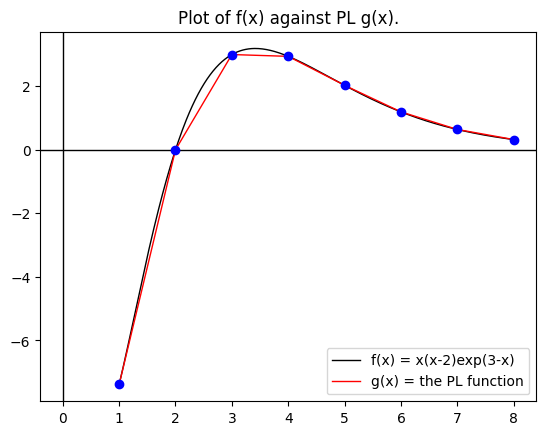

In [10]:

# Piecewise-Linear Interpolation Example

# The continuous function we'll be approximating
def f(x):
    return x*(x-2)*np.exp(3-x)

## The PL function interpolating f on these nodes

# y-values of f on the integer nodes
Y = []
for i in range(1,9):
    Y.append(f(i))

# PL function g(x) on the integer nodes
def g(x):
    for i in range(1,9):
        if i<= x and x < i+1:
            return Y[i-1]*(float(i+1)-x)+Y[i]*(x-float(i))
        elif x==8:
            return f(8)

# 100 x-values between 1 and 8, for plotting
x = np.linspace(1,8,400)

# corresponding y-values of the PL g(x)
Z = []
for i in range(len(x)):
   Z.append(g(x[i]))

# Plot f(x) and g(x)
nodes_x = np.linspace(1,8,8)
fig, ax = plt.subplots()
ax.plot(x,f(x),color="k",linewidth=1,label="f(x) = x(x-2)exp(3-x)")
ax.plot(x,Z,color="r",linewidth=1, label="g(x) = the PL function")
ax.legend(("f(x) = x(x-2)exp(3-x)","g(x) = the PL function"))
ax.set_title("Plot of f(x) against PL g(x).")
plt.axvline(color="k",linewidth=1)
plt.axhline(color="k",linewidth=1)
ax.plot(nodes_x,f(nodes_x),'o',color="b")
plt.show()

### Cubic Spline Interpolation

Suppose $f\in C([a,b])$ and let $a\leq x_0<x_1<\cdots<x_n\leq b$ be $n+1$ sample data point $x$-values.  We would like to improve on PL interpolation not only for reasons of accuracy on the subintervals $[x_i,x_{i+1}]$, but also because PL interpolants, though continuous, are not usually differentiable at the nodes $x_i$.  

The natural choice would seem to be a ***piecewise quadratic*** interpolant, connecting each consecutive pair of data points $(x_i,f(x_i))$, $(x_{i+1},f(x_{i+1}))$ by a quadratic polynomial.  However, it is an easy exercise to observe that the resulting $g(x)$ would be differentiable at all nodes *except* $x_0$ and $x_n$.  

For this reason we try a ***piecewise cubic polynomial*** $g(x)$ constructed by joining consecutive nodes by cubic interpolant, and we demand also, importantly, that the *derivatives agree* there,
$$
\begin{aligned}
&p_i(x_{i+1})=p_{i+1}(x_{i+1})\\
&p_i'(x_{i+1})=p_{i+1}'(x_{i+1})
\end{aligned}
$$
The resulting $g$ will be seen to belong to $C^2([a,b])$.  The basic reason cubics work better than quadratics is that the vector space dimension of $\mathbb{R}_3[x]$ (real polynomials of degree $\leq 3$) is $4$, rather than $3$, meaning each cubic interpolant $p_i(x)$ is uniquely determined by $4$ coefficients,
$$
p_i(x)= a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3
$$
and we can compute these coefficients!

To see this, notice immediately that all $a_i$ are automatically determined, and they also offer some recursion relations,
$$
\begin{aligned}
&a_i = p_i(x_i) = f(x_i)\\
&a_{i+1} = p_{i+1}(x_{i+1}) = p_{i}(x_{i+1}) = a_i + b_ih_i + c_ih_i^2+d_ih_i^3
\end{aligned}
$$
where $h_i\equiv \Delta x_i= x_{i+1}-x_i$.  Next, consider the $b_i$,
$$
\begin{aligned}
&b_i = b_i + 2c_i(x_i-x_i)+3d_i(x_i-x_i)^2 = p_i'(x_i) \\
&b_{i+1} = p_{i+1}'(x_{i+1}) = p_{i}'(x_{i+1}) = b_i + 2c_ih_i+3d_ih_i^2
\end{aligned}
$$
Defining 
$$
c_n\stackrel{\text{def}}{=} \frac{p_{n-1}''(x_n)}{2}=\frac{2c_{n-1}+6d_{n-1}h_{n-1}}{2} = c_{n-1}+3d_{n-1}h_{n-1}
$$
(or $c_n=0$ if we have free/natural boundary conditions, see below), we recursively compute 
$$
c_{i+1} = \frac{p_{i+1}''(x_{i+1})}{2} = \frac{p_{i}''(x_{i+1})}{2}  = c_i+3d_ih_i
$$
Then we solve this for 
$$
d_i= \frac{c_{i+1}-c_i}{3h_i}
$$
and plug these into the expression for $a_{i+1}$ and $b_{i+1}$. Following this we solve the $a_{i+1}$ expression for $b_i$, reduce the index, and plug into the $b_{j+1}$ expression.  Because all $a_i=f(x_i)$ are known, this system involves only $c_i$ as unknowns, and we have only to recursively back-substitute for 
$$
\begin{aligned}
&b_i = \frac{a_{i+1}-a_i}{h_i}-\frac{h_i}{3}(2c_i+c_{i+1}) \\
&b_{i+1} = \frac{c_{i+1}}{3h_i}
\end{aligned}
$$
There are two boundary conditions imposed to clinch the $c_i$, which in turn clinch the $b_i$ and $d_i$, the **natural boundary condition** and the **clamped boundary condition**.  We discuss and illustrate each with an example. 

#### Natural Splines

**Natural splines**, which require the additional **boundary condition** $g''(a)=g''(b)=0$, implies $c_0=c_n=0$ along with the recursion relations
$$
\langle h_{i-1}, 2(h_{i-1}+h_i),h_i\rangle{\boldsymbol\cdot}\begin{pmatrix}c_{i-1}\\ c_i\\ c_{i+1}\end{pmatrix}
$$
or more succinctly
$$
\begin{pmatrix}
1       &0          &0          &0      &\cdots             &0                  &0\\
h_0     &2(h_0+h_1) &h_1        &0      &\cdots             &0                  &0\\
0       &h_1        &2(h_1+h_2) &h_2    &\cdots             &0                  &0\\
\vdots  &\vdots     &\ddots     &\ddots &\ddots             &\vdots             &\vdots\\
0       &0          &           &       &                   &2(h_{n-2}+h_{n-1}) &h_{n-1}\\
0       &0          &0          &0      &\cdots             &0                  &1
\end{pmatrix}
\begin{pmatrix}
c_0\\ c_1\\ c_2\\ \vdots\\ c_{n-1}\\ c_n
\end{pmatrix}
\ =\ 
\begin{pmatrix}
0\\
\frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0)\\
\vdots\\
\frac{3}{h_{n-1}}(a_n-a_{n-1})-\frac{3}{h_{n-2}}(a_{n-1}-a_{n-2})
\end{pmatrix}
$$
Since the matrix $A$ in the system $A\mathbf{c}=\mathbf{h}$ is invertible (Exercise!), the vector $\mathbf{c}$ of coefficients $c_i$ is uniquely defined, and since $\mathbf{a}$ is already defined, all other coefficients $\mathbf{b}$ and $\mathbf{d}$ are also uniquely defined. We conclude that a unique cubic spline interpolant $g(x)$ exists for these boundary conditions.

#### Natural Spline Example

The following is an implementation of these recursion relations to produce a natural cubic spline interpolating $4$ data points from the graph of $f(x)=e^x$, at 

\begin{array}{l|l}
x   &y\\
\hline
0   &e^0 \\
1   &e^1\\
2   &e^2\\
3   &e^3
\end{array}

For S_0 (x), the constants are:    a[0] = 1.00000    b[0]  = 1.46600    c[0] = 0.00000    d[0] = 0.25228
For S_1 (x), the constants are:    a[1] = 2.71828    b[1]  = 2.22285    c[1] = 0.75685    d[1] = 1.69107
For S_2 (x), the constants are:    a[2] = 7.38906    b[2]  = 8.80977    c[2] = 5.83007    d[2] = -1.94336


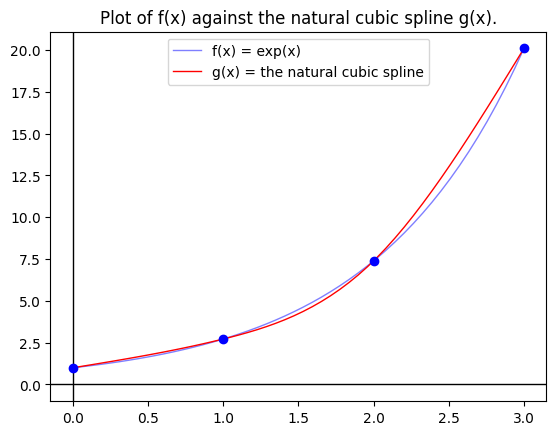

In [11]:

def f(x):
    return np.exp(x)

# The inputs and computation of the h_i and alpha_i
n = 3

x = [i for i in range(n+1)]
a = [f(i) for i in range(n+1)]
h = [x[i+1]-x[i] for i in range(n)]
alpha = [3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1] for i in range(1,n)]

# Solving the tridiagonal matrix equation using Algorithm 6.7
# Step 1: define l's, m's and z's
l = [1]
m = [0]
z = [0]

for i in range(1,n):
    l.append(2*(x[i+1]-x[i-1])-h[i-1]*m[i-1])
    m.append(h[i]/l[i])
    z.append((alpha[i-1]-h[i-1]*z[i-1])/l[i])

l.append(1)
z.append(0)

# Step 2: solve for the c's, b's and d's
C = [0]
c = []
b = []
d = []
B = []
D = []

for j in range(n+1):
    C.append(z[n-1-j] - m[n-1-j]*C[j])
    B.append((a[n-j]-a[n-1-j])/h[n-1-j]-h[n-1-j]*(C[j]+2*C[j+1])/3)
    D.append((C[j]-C[j+1])/(3*h[n-1-j]))

for k in range(n):
    c.append(C[n-k])
    b.append(B[n-1-k])
    d.append(D[n-1-k])

a = a[0:3]
for j in range(n):
    print("For S_%d"%j,"(x), the constants are:    a[%d]"%j,"= %0.5f"%a[j],\
          "   b[%d]"%j," = %0.5f"%b[j],\
          "   c[%d]"%j,"= %0.5f"%c[j],\
          "   d[%d]"%j,"= %0.5f"%d[j])

def g(x):
    xi = 0.0
    for i in range(n):
        if xi <= x and x < xi + 1.0:
            return a[i]+b[i]*(x-xi)+c[i]*(x-xi)**2+d[i]*(x-xi)**3

        elif x == 3.0:
            return f(3)
        xi = xi + 1.0
        

x2 = np.linspace(0,3)
Z = []
for j in range(len(x2)):
    rr = x2[j]
    Z.append(g(rr))

# Plot f(x) and g(x)
W = np.linspace(0,3,4)
K, BX = plt.subplots()
BX.plot(x2,f(x2),color="b",alpha=0.5,linewidth=1)
BX.plot(x2,Z,color="r",linewidth=1)
BX.legend(("f(x) = exp(x)","g(x) = the natural cubic spline"))
BX.set_title("Plot of f(x) against the natural cubic spline g(x).")
plt.axvline(color="k",linewidth=1)
plt.axhline(color="k",linewidth=1)
BX.plot(W,f(W),'o',color="b")
plt.show()
 

#### Clamped Cupic Splines

**Clamped cubic splines** require instead the **clamped boundary conditions**
$$
\begin{aligned}
&g'(x_0)=f'(x_0)=b_0=\frac{a_1-a_0}{h_0}-\frac{h_0}{3}(2c_0+c_1)\\
&g'(x_n)=f'(x_n)=b_n=b_{n-1}+(c_{n-1}+c_n)h_{n-1}
\end{aligned}
$$
from which it follows, after some calculations, that 
$$
A\mathbf{c}=\mathbf{h}
$$
where 
$$
A = 
\begin{pmatrix}
2h_0    &h_0        &0          &0      &\cdots             &0                  &0\\
h_0     &2(h_0+h_1) &h_1        &0      &\cdots             &0                  &0\\
0       &h_1        &2(h_1+h_2) &h_2    &\cdots             &0                  &0\\
\vdots  &\vdots     &\ddots     &\ddots &\ddots             &\vdots             &\vdots\\
0       &0          &           &       &                   &2(h_{n-2}+h_{n-1}) &h_{n-1}\\
0       &0          &0          &0      &\cdots             &h_{n-1}            &2h_n
\end{pmatrix}
\in \textsf{GL}(n+1,\mathbb{R})
$$
$$
\mathbf{c}= 
\begin{pmatrix}
c_0\\ \vdots\\ c_n
\end{pmatrix}
\in\mathbb{R}^{n+1},
\qquad
\mathbf{h}=
\begin{pmatrix}
\frac{3}{h_0}(a_1-a_0)-3f'(x_0)\\
\frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0)\\
\vdots\\
\frac{3}{h_{n-1}}(a_n-a_{n-1})-\frac{3}{h_{n-2}}(a_{n-1}-a_{n-2})\\
3f'(x_n)-\frac{3}{h_{n-1}}(a_{n}-a_{n-1})
\end{pmatrix}
\in\mathbb{R}^{n+1}
$$

Let us illustrate this algorithm resulting with a clamped cubic spline interpolating the same $4$ data points from the graph of $f(x)=e^x$, at $x_0=1$, $x_1=1$, $x_2=2$ and $x_3=3$.  We use this to approximate $f(2.5)$ and $f'(2.5)$ by $g(2.5)$ and $g'(2.5)$.

#### Example of a Clamped Cubic Spline Interpolant
The following is an implementation of these recursion relations to produce a clamped cubic spline interpolating $4$ data points from the graph of $f(x)=e^x$, at 

\begin{array}{l|l}
x   &y\\
\hline
0   &e^0 \\
1   &e^1\\
2   &e^2\\
3   &e^3
\end{array}


	 Clamped cubic spline through the four data points:

	 n	 x_n 	 y_n
	----------------------------
	 0 	 0.0 	 1.0000000
	 1 	 1.0 	 2.7182818
	 2 	 2.0 	 7.3890561
	 3 	 3.0 	 20.0855369
	----------------------------


	 The following output gives the coefficients of the two cubic
	 polynomials p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3:
	------------------------------------------------------------------------------------------------
	 p_0 (x) coefficients:    a[0] = 1.00000    b[0]  = 1.00000    c[0] = 0.44468    d[0] = 0.27360
	 p_1 (x) coefficients:    a[1] = 2.71828    b[1]  = 2.71016    c[1] = 1.26548    d[1] = 0.69513
	 p_2 (x) coefficients:    a[2] = 7.38906    b[2]  = 7.32652    c[2] = 3.35087    d[2] = 2.01909
	------------------------------------------------------------------------------------------------

	 The y-values were generated by the following function and it's derivative:

	 f(x) = x^2cos(x) - 3x
	 f'(x) = 2xcos(x)-x^2sin(x)-3.

	 The errors in using 

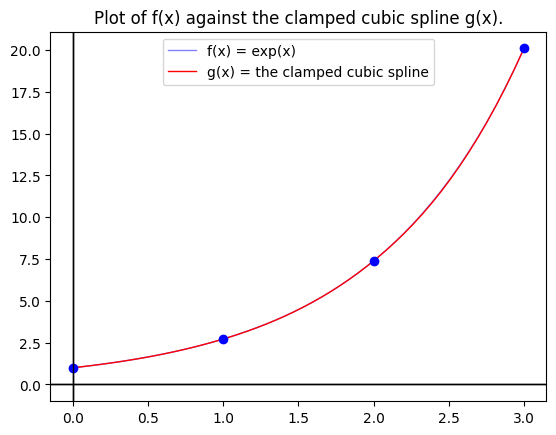

In [12]:
# Example - Clamped Cubic Spline

import numpy as np
import matplotlib.pyplot as plt

# The inputs and computation of the h_i and alpha_i
n = 3

x = [0,1,2,3]
a = [np.exp(i) for i in x]
aa = [1, np.exp(3)]

h = [x[i+1]-x[i] for i in range(n)]

alphaA = [3*(a[1]-a[0])/h[0]-3*aa[0]]
alphaB = [3*aa[1]-3*(a[n]-a[n-1])/h[0]]
alphaC = [3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1] for i in range(1,n)]
alpha = alphaA + alphaC + alphaB 

# Solving the tridiagonal matrix equation using Algorithm 6.7 in Burden and Faires

# Step 1: define l's, m's and z's
l = [2*h[0]]
m = [0.5]
z = [alpha[0]/l[0]]

for i in range(1,n):
    l.append(2*(x[i+1]-x[i-1])-h[i-1]*m[i-1])
    m.append(h[i]/l[i])
    z.append((alpha[i]-h[i-1]*z[i-1])/l[i])

l.append(h[n-1]*(2-m[n-1]))
z.append((alpha[n]-h[n-1]*z[n-1])/l[n])

# Step 2: solve for the c's, b's and d's
C = [z[n]]
c = []
b = []
d = []
B = []
D = []

for j in range(n+1):
    C.append(z[n-1-j] - m[n-1-j]*C[j])
    B.append((a[n-j]-a[n-1-j])/h[n-1-j]-h[n-1-j]*(C[j]+2*C[j+1])/3)
    D.append((C[j]-C[j+1])/(3*h[n-1-j]))

for k in range(n):
    c.append(C[n-k])
    b.append(B[n-1-k])
    d.append(D[n-1-k])

print("\n\t Clamped cubic spline through the four data points:\n")
print("\t n\t x_n \t y_n")
print("\t----------------------------")
for i in range(n+1):
    print("\t %d"%i,"\t %0.1f"%x[i],"\t %0.7f"%a[i])
print("\t----------------------------\n\n")

print("\t The following output gives the coefficients of the two cubic")
print("\t polynomials p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3:")
print("\t---------------------------------------------\
---------------------------------------------------")
a = a[0:4]
for j in range(n):
    print("\t p_%d"%j,"(x) coefficients:    a[%d]"%j,"= %0.5f"%a[j],\
          "   b[%d]"%j," = %0.5f"%b[j],\
          "   c[%d]"%j,"= %0.5f"%c[j],\
          "   d[%d]"%j,"= %0.5f"%d[j])
print("\t---------------------------------------------\
---------------------------------------------------")

# Error term

# Step 1: define our f(x) and f'(x), 
# and the cubic spline CS(x) as a 
# piecewise function, and CS'(x)
def f(x):
    return np.exp(x)

def df(x):
    return np.exp(x)

x0 = x[0]
x1 = x[1]
x2 = x[2]
x3 = x[3]
dx = x2-x1

def CS(x):
    if (x0 <= x) and (x < x1):
        return a[0]+b[0]*(x-x0)+c[0]*(x-x0)**2+d[0]*(x-x0)**3

    elif (x1 <= x) and (x < x2):
        return a[1]+b[1]*(x-x1)+c[1]*(x-x1)**2+d[1]*(x-x1)**3

    elif (x2 <= x) and (x < x3):
        return a[2]+b[2]*(x-x2)+c[2]*(x-x2)**2+d[2]*(x-x2)**3

    else:
        return a[2]+b[2]*(x3-x2)+c[2]*(x3-x2)**2+d[2]*(x3-x2)**3

def dCS(x):
    if (x0 <= x) and (x < x1):
        return b[0]+2*c[0]*(x-x0)+3*d[0]*(x-x0)**2

    elif (x1 <= x) and (x < x2):
        return b[1]+2*c[1]*(x-x1)+3*d[1]*(x-x1)**2

    elif (x2 <= x) and (x < x3):
        return b[2]+2*c[2]*(x-x2)+3*d[2]*(x-x2)**2

    else:
        return a[2]+b[2]*(x3-x2)+c[2]*(x3-x2)**2+d[2]*(x3-x2)**3
 
    # Step 2: Compute the errors

print("\n\t The y-values were generated by the following function and it's derivative:\n")
print("\t f(x) = x^2cos(x) - 3x\n\t f'(x) = 2xcos(x)-x^2sin(x)-3.\n")
print("\t The errors in using the cubic spline S(x) to approximate f(0.18) are:")
print("\t--------------------------------------------")
err = abs(f(2.5)-CS(2.5))
derr = abs(df(2.5)-dCS(2.5))
print("\t E(2.5) = |f(2.5)-CS(2.5)| = %0.7f"%err)
print("\t E'(2.5) = |f'(2.5)-CS'(2.5)| = %0.7f"%derr)
print("\t--------------------------------------------")

# Plot the spline and data points

# Step 1: Create the list Z of y-values of PL(t)
t = np.linspace(x0,x3)
Z = []
W = []
for i in range(len(t)):
   Z.append(CS(t[i]))
   W.append(f(t[i]))

# Step 2: Plot    
fig, ax = plt.subplots()
ax.plot(t,W,color="b",alpha=0.5,linewidth=1)
ax.plot(t,Z,color="r",linewidth=1)
ax.set_title("Clamped cubic spline CS(x) through the data points.")
plt.axvline(color="k",linewidth=1)
plt.axhline(color="k",linewidth=1)
ax.plot(x,a,'o',color="b")
ax.legend(("f(x) = exp(x)","g(x) = the clamped cubic spline"))
ax.set_title("Plot of f(x) against the clamped cubic spline g(x).")
plt.axvline(color="k",linewidth=1)
plt.axhline(color="k",linewidth=1)
plt.show()